Utilisation de l'api whiskyhunter et manipulation de fichiers

In [ ]:
%pip install requests pandas matplotlib

Erreur lors de la récupération des données détaillées pour le slug aberargie
Erreur lors de la récupération des données détaillées pour le slug aioi_unibio_co._ltd.
Erreur lors de la récupération des données détaillées pour le slug ardenistile
Erreur lors de la récupération des données détaillées pour le slug benachie
Erreur lors de la récupération des données détaillées pour le slug ben_wyvis_/_ferintosh
Erreur lors de la récupération des données détaillées pour le slug broombrae
Erreur lors de la récupération des données détaillées pour le slug clutha
Erreur lors de la récupération des données détaillées pour le slug corry_(broadford)
Erreur lors de la récupération des données détaillées pour le slug falkirk__company
Erreur lors de la récupération des données détaillées pour le slug gartbreck
Erreur lors de la récupération des données détaillées pour le slug glenfyne_(glendarroch_glenglip)
Erreur lors de la récupération des données détaillées pour le slug glenramskill
Erreur lors de 

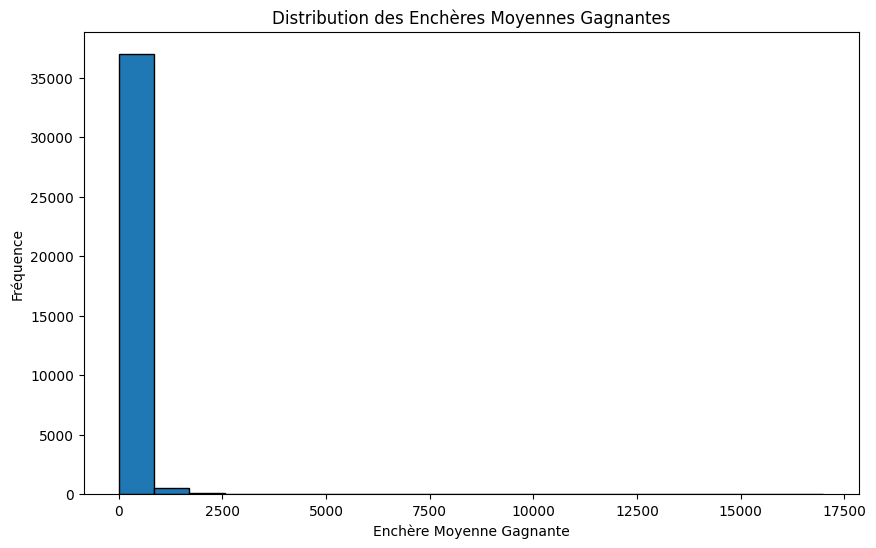

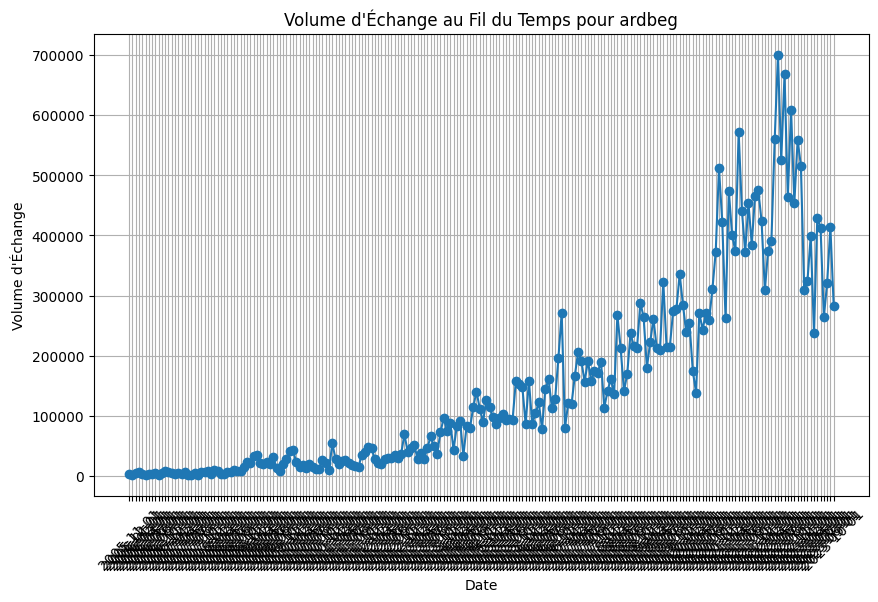

In [11]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Spécifier l'endpoint de l'API pour les informations de base des distilleries
endpoint_base = 'https://whiskyhunter.net/api/distilleries_info/'

# Envoyer une requête GET à l'endpoint et récupérer les données de base
response_base = requests.get(endpoint_base)
if response_base.status_code == 200:
    data_base = response_base.json()
    df_base = pd.DataFrame(data_base)
else:
    print(f"Erreur lors de la requête de base : {response_base.status_code}")
    raise Exception("Échec de la récupération des données de base")

# DataFrame pour stocker toutes les informations détaillées
df_detailed = pd.DataFrame()

# Boucle pour récupérer les données détaillées pour chaque distillerie
for slug in df_base['slug']:
    endpoint_detailed = f'https://whiskyhunter.net/api/distillery_data/{slug}/'
    response_detailed = requests.get(endpoint_detailed)
    if response_detailed.status_code == 200:
        data_detailed = response_detailed.json()
        
        # Convertir les données en DataFrame
        df_temp = pd.DataFrame(data_detailed)
        df_temp['slug'] = slug  # Ajouter une colonne "slug" pour le multi-index
        
        # Concaténer avec le DataFrame détaillé
        df_detailed = pd.concat([df_detailed, df_temp], ignore_index=True)
    else:
        print(f"Erreur lors de la récupération des données détaillées pour le slug {slug}")

# Créer un DataFrame multi-index avec (slug, dt) comme index
df_detailed.set_index(['slug', 'dt'], inplace=True)

# Afficher le DataFrame détaillé pour un slug spécifique, par exemple 'ardbeg'
example_slug = 'ardbeg'
if example_slug in df_detailed.index.get_level_values('slug'):
    ardbeg_data = df_detailed.loc[example_slug]
    print(ardbeg_data)
else:
    print(f"Aucune donnée détaillée trouvée pour le slug {example_slug}")
    
# ... (Votre script existant pour récupérer les données de base et détaillées) ...

# Obtenir la liste des slugs présents dans df_detailed
slugs_in_detailed = df_detailed.index.get_level_values('slug').unique()

# Filtrer df_base pour ne conserver que les entrées dont les slugs sont présents dans df_detailed
df_base_filtered = df_base[df_base['slug'].isin(slugs_in_detailed)]

# Maintenant, df_base_filtered contient seulement les entrées dont les informations détaillées ont été récupérées
print(df_base_filtered.head())
mean_winning_bid = df_detailed['winning_bid_mean'].mean()
print("Moyenne des enchères moyennes gagnantes :", mean_winning_bid)

# Exemple de visualisation : Histogramme des enchères moyennes gagnantes
plt.figure(figsize=(10, 6))
plt.hist(df_detailed['winning_bid_mean'].dropna(), bins=20, edgecolor='black')
plt.title('Distribution des Enchères Moyennes Gagnantes')
plt.xlabel('Enchère Moyenne Gagnante')
plt.ylabel('Fréquence')
plt.show()

# Exemple de graphique en ligne : Volume d'échange au fil du temps pour une distillerie spécifique
slug_specific = 'ardbeg'  # Remplacez par le slug de votre choix
df_specific = df_detailed.loc[slug_specific].sort_values(by='dt')

plt.figure(figsize=(10, 6))
plt.plot(df_specific.index.get_level_values('dt'), df_specific['trading_volume'], marker='o')
plt.title(f'Volume d\'Échange au Fil du Temps pour {slug_specific}')
plt.xlabel('Date')
plt.ylabel('Volume d\'Échange')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()